In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [53]:
stock_df = pd.read_csv('S&P_500_Data.csv')
stock_df

,Date,Price,Open,High,Low,Vol.,Change %
0,11/12/2025,"6,847.98","6,868.51","6,869.83","6,827.76",NaN,0.02%
1,11/11/2025,"6,846.61","6,815.64","6,855.13","6,806.87",NaN,0.21%
2,11/10/2025,"6,832.43","6,785.36","6,841.32","6,770.56",NaN,1.54%
3,11/07/2025,"6,728.80","6,696.18","6,730.11","6,631.44",NaN,0.13%
4,11/06/2025,"6,720.32","6,787.59","6,796.68","6,707.51",NaN,-1.12%
...,...,...,...,...,...,...,...
2006,11/17/2017,"2,578.80","2,582.90","2,584.00","2,577.60",NaN,-0.26%
2007,11/16/2017,"2,585.60","2,572.90","2,590.10","2,572.90",NaN,0.82%
2008,11/15/2017,"2,564.60","2,569.40","2,572.80","2,557.40",NaN,-0.55%
2009,11/14/2017,"2,578.90","2,577.80","2,579.70","2,566.60",NaN,-0.23%


In [54]:
ffr_df = pd.read_csv('Federal_Funds_Rate.csv')
ffr_df

,Date,M2_Money_Supply,10Y Treasury Yield,Fed Funds Rate,CPI,Inflation_Rate_%,SOFR
0,2018-04-03,13993.9,2.87,1.69,250.227,2.470996,1.83
1,2018-04-04,13993.9,2.87,1.69,250.227,2.470996,1.74
2,2018-04-05,13993.9,2.87,1.69,250.227,2.470996,1.75
3,2018-04-06,13993.9,2.87,1.69,250.227,2.470996,1.75
4,2018-04-09,13993.9,2.87,1.69,250.227,2.470996,1.75
...,...,...,...,...,...,...,...
1885,2025-06-24,21942.0,4.42,4.33,320.580,2.375934,4.30
1886,2025-06-25,21942.0,4.42,4.33,320.580,2.375934,4.36
1887,2025-06-26,21942.0,4.42,4.33,320.580,2.375934,4.40
1888,2025-06-27,21942.0,4.42,4.33,320.580,2.375934,4.40


In [55]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])
ffr_df['Date'] = pd.to_datetime(ffr_df['Date'])

In [56]:
filtered_df = stock_df[(stock_df['Date'] >= '2018-04-03') & (stock_df['Date'] <= '2025-06-28')]
stock_df = filtered_df


In [57]:
stock_df = stock_df.drop(columns=['Vol.'])

In [58]:
stock_df_cleaned = stock_df.dropna()
ffr_df_cleaned = ffr_df.dropna()


In [59]:
stock_df_cleaned

,Date,Price,Open,High,Low,Change %
96,2025-06-27,"6,173.07","6,150.70","6,187.68","6,132.35",0.52%
97,2025-06-26,"6,141.02","6,112.09","6,146.52","6,107.27",0.80%
98,2025-06-25,"6,092.16","6,104.23","6,108.51","6,080.09",0.00%
99,2025-06-24,"6,092.18","6,061.21","6,101.76","6,059.25",1.11%
100,2025-06-23,"6,025.17","5,969.67","6,028.77","5,943.23",0.96%
...,...,...,...,...,...,...
1911,2018-04-09,"2,613.20","2,617.20","2,653.60","2,610.80",0.33%
1912,2018-04-06,"2,604.50","2,645.80","2,656.90","2,586.30",-2.19%
1913,2018-04-05,"2,662.80","2,657.40","2,672.10","2,649.60",0.68%
1914,2018-04-04,"2,644.70","2,584.00","2,649.90","2,573.60",1.16%


In [60]:
ffr_df_cleaned

,Date,M2_Money_Supply,10Y Treasury Yield,Fed Funds Rate,CPI,Inflation_Rate_%,SOFR
0,2018-04-03,13993.9,2.87,1.69,250.227,2.470996,1.83
1,2018-04-04,13993.9,2.87,1.69,250.227,2.470996,1.74
2,2018-04-05,13993.9,2.87,1.69,250.227,2.470996,1.75
3,2018-04-06,13993.9,2.87,1.69,250.227,2.470996,1.75
4,2018-04-09,13993.9,2.87,1.69,250.227,2.470996,1.75
...,...,...,...,...,...,...,...
1885,2025-06-24,21942.0,4.42,4.33,320.580,2.375934,4.30
1886,2025-06-25,21942.0,4.42,4.33,320.580,2.375934,4.36
1887,2025-06-26,21942.0,4.42,4.33,320.580,2.375934,4.40
1888,2025-06-27,21942.0,4.42,4.33,320.580,2.375934,4.40


In [61]:
stock_df_cleaned.to_csv("stock_df_cleaned.csv", index=False)
ffr_df_cleaned.to_csv("ffr_df_cleaned.csv", index=False)

In [62]:
merged_df = pd.merge(stock_df, ffr_df, on = 'Date', how = 'inner')
merged_df


,Date,Price,Open,High,Low,Change %,M2_Money_Supply,10Y Treasury Yield,Fed Funds Rate,CPI,Inflation_Rate_%,SOFR
0,2025-06-27,"6,173.07","6,150.70","6,187.68","6,132.35",0.52%,21942.0,4.42,4.33,320.580,2.375934,4.40
1,2025-06-26,"6,141.02","6,112.09","6,146.52","6,107.27",0.80%,21942.0,4.42,4.33,320.580,2.375934,4.40
2,2025-06-25,"6,092.16","6,104.23","6,108.51","6,080.09",0.00%,21942.0,4.42,4.33,320.580,2.375934,4.36
3,2025-06-24,"6,092.18","6,061.21","6,101.76","6,059.25",1.11%,21942.0,4.42,4.33,320.580,2.375934,4.30
4,2025-06-23,"6,025.17","5,969.67","6,028.77","5,943.23",0.96%,21942.0,4.42,4.33,320.580,2.375934,4.29
...,...,...,...,...,...,...,...,...,...,...,...,...
1815,2018-04-09,"2,613.20","2,617.20","2,653.60","2,610.80",0.33%,13993.9,2.87,1.69,250.227,2.470996,1.75
1816,2018-04-06,"2,604.50","2,645.80","2,656.90","2,586.30",-2.19%,13993.9,2.87,1.69,250.227,2.470996,1.75
1817,2018-04-05,"2,662.80","2,657.40","2,672.10","2,649.60",0.68%,13993.9,2.87,1.69,250.227,2.470996,1.75
1818,2018-04-04,"2,644.70","2,584.00","2,649.90","2,573.60",1.16%,13993.9,2.87,1.69,250.227,2.470996,1.74


In [63]:
#new features
num_cols = ['Price', 'Open', 'High', 'Low', 'M2_Money_Supply', '10Y Treasury Yield', 'Fed Funds Rate', 'CPI', 'Inflation_Rate_%', 'SOFR']

for col in num_cols:
    merged_df[col] = (merged_df[col].astype(str).str.replace(',', '', regex=False).str.replace('%', '', regex=False))
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')


In [64]:
merged_df = merged_df.sort_values('Date').reset_index(drop=True)

merged_df['Log_Return'] = np.log(merged_df['Price'] / merged_df['Price'].shift(1))
merged_df['Volatility_30D'] = merged_df['Log_Return'].rolling(window = 30).std()
merged_df['FedFunds_Change'] = merged_df['Fed Funds Rate'].diff()
merged_df['SOFR_Change'] = merged_df['SOFR'].diff()
merged_df['Intraday_Range'] = merged_df['High'] - merged_df['Low']

merged_df = merged_df.dropna().reset_index(drop = True)
merged_df

,Date,Price,Open,High,Low,Change %,M2_Money_Supply,10Y Treasury Yield,Fed Funds Rate,CPI,Inflation_Rate_%,SOFR,Log_Return,Volatility_30D,FedFunds_Change,SOFR_Change,Intraday_Range
0,2018-05-15,2711.40,2718.60,2718.60,2701.90,-0.68%,14049.6,2.98,1.70,250.792,2.781922,1.79,-0.006873,0.008575,0.0,0.04,16.70
1,2018-05-16,2722.50,2712.60,2727.80,2712.20,0.41%,14049.6,2.98,1.70,250.792,2.781922,1.75,0.004085,0.008372,0.0,-0.04,15.60
2,2018-05-17,2720.10,2719.70,2732.00,2711.40,-0.09%,14049.6,2.98,1.70,250.792,2.781922,1.74,-0.000882,0.008304,0.0,-0.01,20.60
3,2018-05-18,2713.00,2717.30,2719.50,2709.20,-0.26%,14049.6,2.98,1.70,250.792,2.781922,1.73,-0.002614,0.007134,0.0,-0.01,10.30
4,2018-05-21,2733.00,2725.90,2739.20,2725.70,0.74%,14049.6,2.98,1.70,250.792,2.781922,1.69,0.007345,0.007209,0.0,-0.04,13.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,2025-06-23,6025.17,5969.67,6028.77,5943.23,0.96%,21942.0,4.42,4.33,320.580,2.375934,4.29,0.009561,0.009136,0.0,0.00,85.54
1760,2025-06-24,6092.18,6061.21,6101.76,6059.25,1.11%,21942.0,4.42,4.33,320.580,2.375934,4.30,0.011060,0.009265,0.0,0.01,42.51
1761,2025-06-25,6092.16,6104.23,6108.51,6080.09,0.00%,21942.0,4.42,4.33,320.580,2.375934,4.36,-0.000003,0.007395,0.0,0.06,28.42
1762,2025-06-26,6141.02,6112.09,6146.52,6107.27,0.80%,21942.0,4.42,4.33,320.580,2.375934,4.40,0.007988,0.007417,0.0,0.04,39.25


In [65]:
percent_cols = ['FedFunds_Change', 'SOFR_Change']

for col in percent_cols:
    merged_df[col] = (merged_df[col] * 100).round(2).astype(str) + '%'

merged_df

,Date,Price,Open,High,Low,Change %,M2_Money_Supply,10Y Treasury Yield,Fed Funds Rate,CPI,Inflation_Rate_%,SOFR,Log_Return,Volatility_30D,FedFunds_Change,SOFR_Change,Intraday_Range
0,2018-05-15,2711.40,2718.60,2718.60,2701.90,-0.68%,14049.6,2.98,1.70,250.792,2.781922,1.79,-0.006873,0.008575,0.0%,4.0%,16.70
1,2018-05-16,2722.50,2712.60,2727.80,2712.20,0.41%,14049.6,2.98,1.70,250.792,2.781922,1.75,0.004085,0.008372,0.0%,-4.0%,15.60
2,2018-05-17,2720.10,2719.70,2732.00,2711.40,-0.09%,14049.6,2.98,1.70,250.792,2.781922,1.74,-0.000882,0.008304,0.0%,-1.0%,20.60
3,2018-05-18,2713.00,2717.30,2719.50,2709.20,-0.26%,14049.6,2.98,1.70,250.792,2.781922,1.73,-0.002614,0.007134,0.0%,-1.0%,10.30
4,2018-05-21,2733.00,2725.90,2739.20,2725.70,0.74%,14049.6,2.98,1.70,250.792,2.781922,1.69,0.007345,0.007209,0.0%,-4.0%,13.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,2025-06-23,6025.17,5969.67,6028.77,5943.23,0.96%,21942.0,4.42,4.33,320.580,2.375934,4.29,0.009561,0.009136,0.0%,0.0%,85.54
1760,2025-06-24,6092.18,6061.21,6101.76,6059.25,1.11%,21942.0,4.42,4.33,320.580,2.375934,4.30,0.011060,0.009265,0.0%,1.0%,42.51
1761,2025-06-25,6092.16,6104.23,6108.51,6080.09,0.00%,21942.0,4.42,4.33,320.580,2.375934,4.36,-0.000003,0.007395,0.0%,6.0%,28.42
1762,2025-06-26,6141.02,6112.09,6146.52,6107.27,0.80%,21942.0,4.42,4.33,320.580,2.375934,4.40,0.007988,0.007417,0.0%,4.0%,39.25


In [66]:
merged_df.to_csv("merged_df.csv", index=False)

In [67]:
merged_df.describe(include='all')

/var/folders/3t/b1gg3c6d52x5v68rmflbztr00000gn/T/ipykernel_52059/158023069.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_df.describe(include='all')


,Date,Price,Open,High,Low,Change %,M2_Money_Supply,10Y Treasury Yield,Fed Funds Rate,CPI,Inflation_Rate_%,SOFR,Log_Return,Volatility_30D,FedFunds_Change,SOFR_Change,Intraday_Range
count,1764,1764.000000,1764.000000,1764.000000,1764.000000,1764,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764.000000,1764,1764,1764.000000
unique,1764,NaN,NaN,NaN,NaN,476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,58,NaN
top,2018-05-15 00:00:00,NaN,NaN,NaN,NaN,-0.16%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0%,0.0%,NaN
freq,1,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1711,851,NaN
first,2018-05-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2025-06-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4043.421287,4042.525238,4065.889977,4017.609819,NaN,19120.784184,2.753838,2.506020,282.572901,3.604659,2.496565,0.000470,0.010729,NaN,NaN,48.280159
std,NaN,995.182956,994.720202,998.526426,991.016423,NaN,2808.403797,1.274977,2.018177,24.686539,2.275267,2.028836,0.012787,0.006982,NaN,NaN,35.376673
min,NaN,2237.400000,2290.700000,2300.700000,2191.900000,NaN,14049.600000,0.620000,0.050000,250.792000,0.198201,0.010000,-0.127657,0.003500,NaN,NaN,5.500000
25%,NaN,3088.950000,3083.450000,3098.025000,3069.200000,NaN,15467.000000,1.620000,0.100000,257.879000,2.000583,0.090000,-0.004605,0.006749,NaN,NaN,25.475000


In [68]:
merged_df.corr()

/var/folders/3t/b1gg3c6d52x5v68rmflbztr00000gn/T/ipykernel_52059/4191659586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


,Price,Open,High,Low,M2_Money_Supply,10Y Treasury Yield,Fed Funds Rate,CPI,Inflation_Rate_%,SOFR,Log_Return,Volatility_30D,Intraday_Range
Price,1.000000,0.999263,0.999618,0.999627,0.823334,0.596937,0.520165,0.889109,0.252071,0.513130,0.028529,-0.176404,0.211967
Open,0.999263,1.000000,0.999675,0.999598,0.823321,0.596867,0.519835,0.889033,0.252695,0.512751,-0.003335,-0.177644,0.214374
High,0.999618,0.999675,1.000000,0.999396,0.826202,0.596823,0.518703,0.890834,0.255397,0.511564,0.010754,-0.169603,0.229203
Low,0.999627,0.999598,0.999396,1.000000,0.820443,0.597369,0.521724,0.887380,0.249338,0.514688,0.014824,-0.185184,0.195243
M2_Money_Supply,0.823334,0.823321,0.826202,0.820443,1.000000,0.387715,0.287751,0.821214,0.569923,0.275281,0.004758,0.039251,0.336709
10Y Treasury Yield,0.596937,0.596867,0.596823,0.597369,0.387715,1.000000,0.914146,0.805249,0.171168,0.909338,-0.004880,-0.198176,0.111427
Fed Funds Rate,0.520165,0.519835,0.518703,0.521724,0.287751,0.914146,1.000000,0.755360,-0.068683,0.997591,0.006936,-0.209119,0.025485
CPI,0.889109,0.889033,0.890834,0.887380,0.821214,0.805249,0.755360,1.000000,0.340027,0.746216,0.000399,-0.056853,0.285862
Inflation_Rate_%,0.252071,0.252695,0.255397,0.249338,0.569923,0.171168,-0.068683,0.340027,1.000000,-0.079651,-0.033444,-0.002202,0.223950
SOFR,0.513130,0.512751,0.511564,0.514688,0.275281,0.909338,0.997591,0.746216,-0.079651,1.000000,0.007678,-0.217289,0.021082


In [69]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1764 non-null   datetime64[ns]
 1   Price               1764 non-null   float64       
 2   Open                1764 non-null   float64       
 3   High                1764 non-null   float64       
 4   Low                 1764 non-null   float64       
 5   Change %            1764 non-null   object        
 6   M2_Money_Supply     1764 non-null   float64       
 7   10Y Treasury Yield  1764 non-null   float64       
 8   Fed Funds Rate      1764 non-null   float64       
 9   CPI                 1764 non-null   float64       
 10  Inflation_Rate_%    1764 non-null   float64       
 11  SOFR                1764 non-null   float64       
 12  Log_Return          1764 non-null   float64       
 13  Volatility_30D      1764 non-null   float64     

In [70]:
merged_df.shape


(1764, 17)

In [71]:
df = merged_df.copy()

outliers = {}

for col in df.columns:
    series = (df[col].astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False))

    series = pd.to_numeric(series, errors='coerce').dropna()

    if series.empty:
        continue

    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = (series < lower) | (series > upper)

    outliers[col] = {'n_outliers': int(mask.sum()), 'lower_bound': round(lower, 4), 'upper_bound': round(upper, 4)}

outlier_df = pd.DataFrame(outliers).T

outlier_df


,n_outliers,lower_bound,upper_bound
Price,0.0,854.8012,6812.5312
Open,0.0,839.8662,6822.7562
High,0.0,844.9612,6853.1312
Low,0.0,839.8963,6784.7062
Change %,104.0,-2.1550,2.3650
M2_Money_Supply,0.0,6691.4000,30093.0000
10Y Treasury Yield,0.0,-1.9200,7.5200
Fed Funds Rate,0.0,-6.6050,11.2750
CPI,0.0,183.6365,381.6165
Inflation_Rate_%,0.0,-2.4190,9.3665


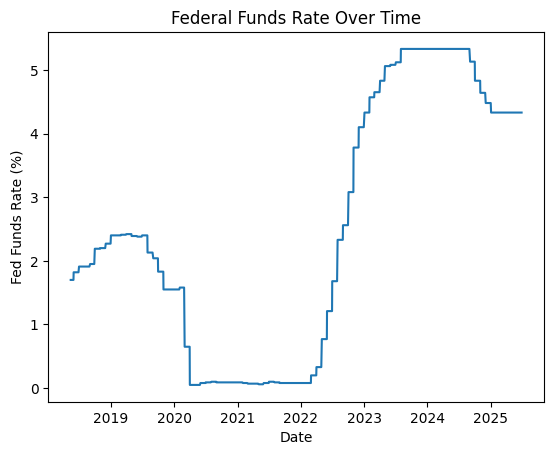

In [72]:
plt.plot(merged_df['Date'], merged_df['Fed Funds Rate'], label='Fed Funds Rate')
plt.title('Federal Funds Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Fed Funds Rate (%)')
plt.show()

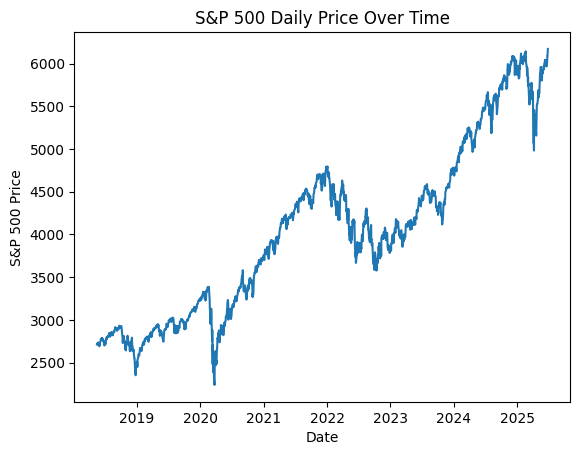

In [73]:
plt.plot(merged_df['Date'], merged_df['Price'], label='S&P 500 Price')
plt.title('S&P 500 Daily Price Over Time')
plt.xlabel('Date')
plt.ylabel('S&P 500 Price')
plt.show()

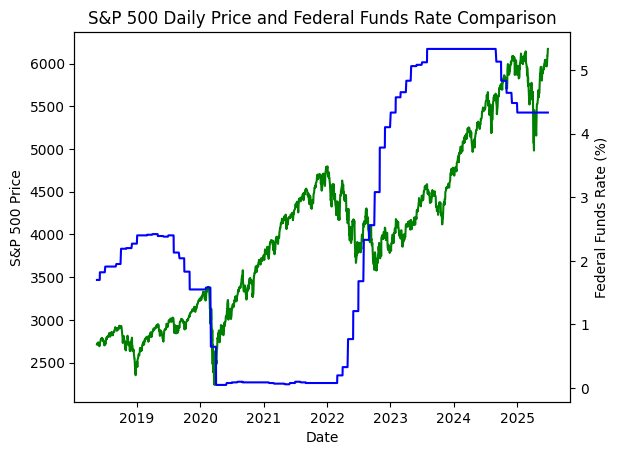

In [74]:
fig, ax1 = plt.subplots()

ax1.plot(merged_df['Date'], merged_df['Price'], color='green', label='S&P 500 Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('S&P 500 Price')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['Fed Funds Rate'], color='blue', label='Fed Funds Rate')
ax2.set_ylabel('Federal Funds Rate (%)')
ax2.tick_params(axis='y')

plt.title('S&P 500 Daily Price and Federal Funds Rate Comparison')

plt.show()


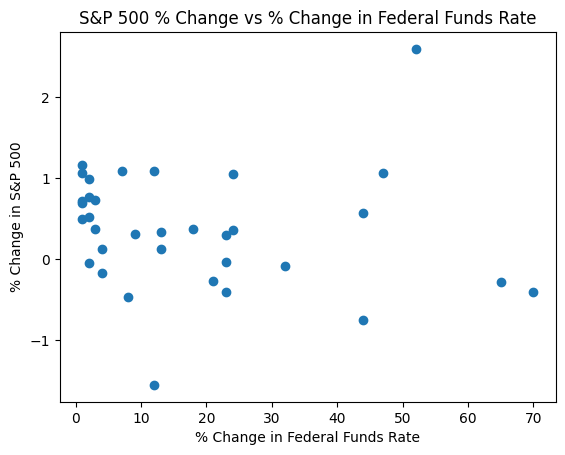

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

df = merged_df.copy()

df['FedFunds_Change_num'] = (df['FedFunds_Change'].astype(str).str.replace('%', '', regex=False).astype(float))

df['Change_pct_num'] = (df['Change %'].astype(str).str.replace('%', '', regex=False).astype(float))

hike_days = df[df['FedFunds_Change_num'] > 0]

plt.figure()
plt.scatter(hike_days['FedFunds_Change_num'], hike_days['Change_pct_num'])

plt.title('S&P 500 % Change vs % Change in Federal Funds Rate')
plt.xlabel('% Change in Federal Funds Rate')
plt.ylabel('% Change in S&P 500')

plt.show()


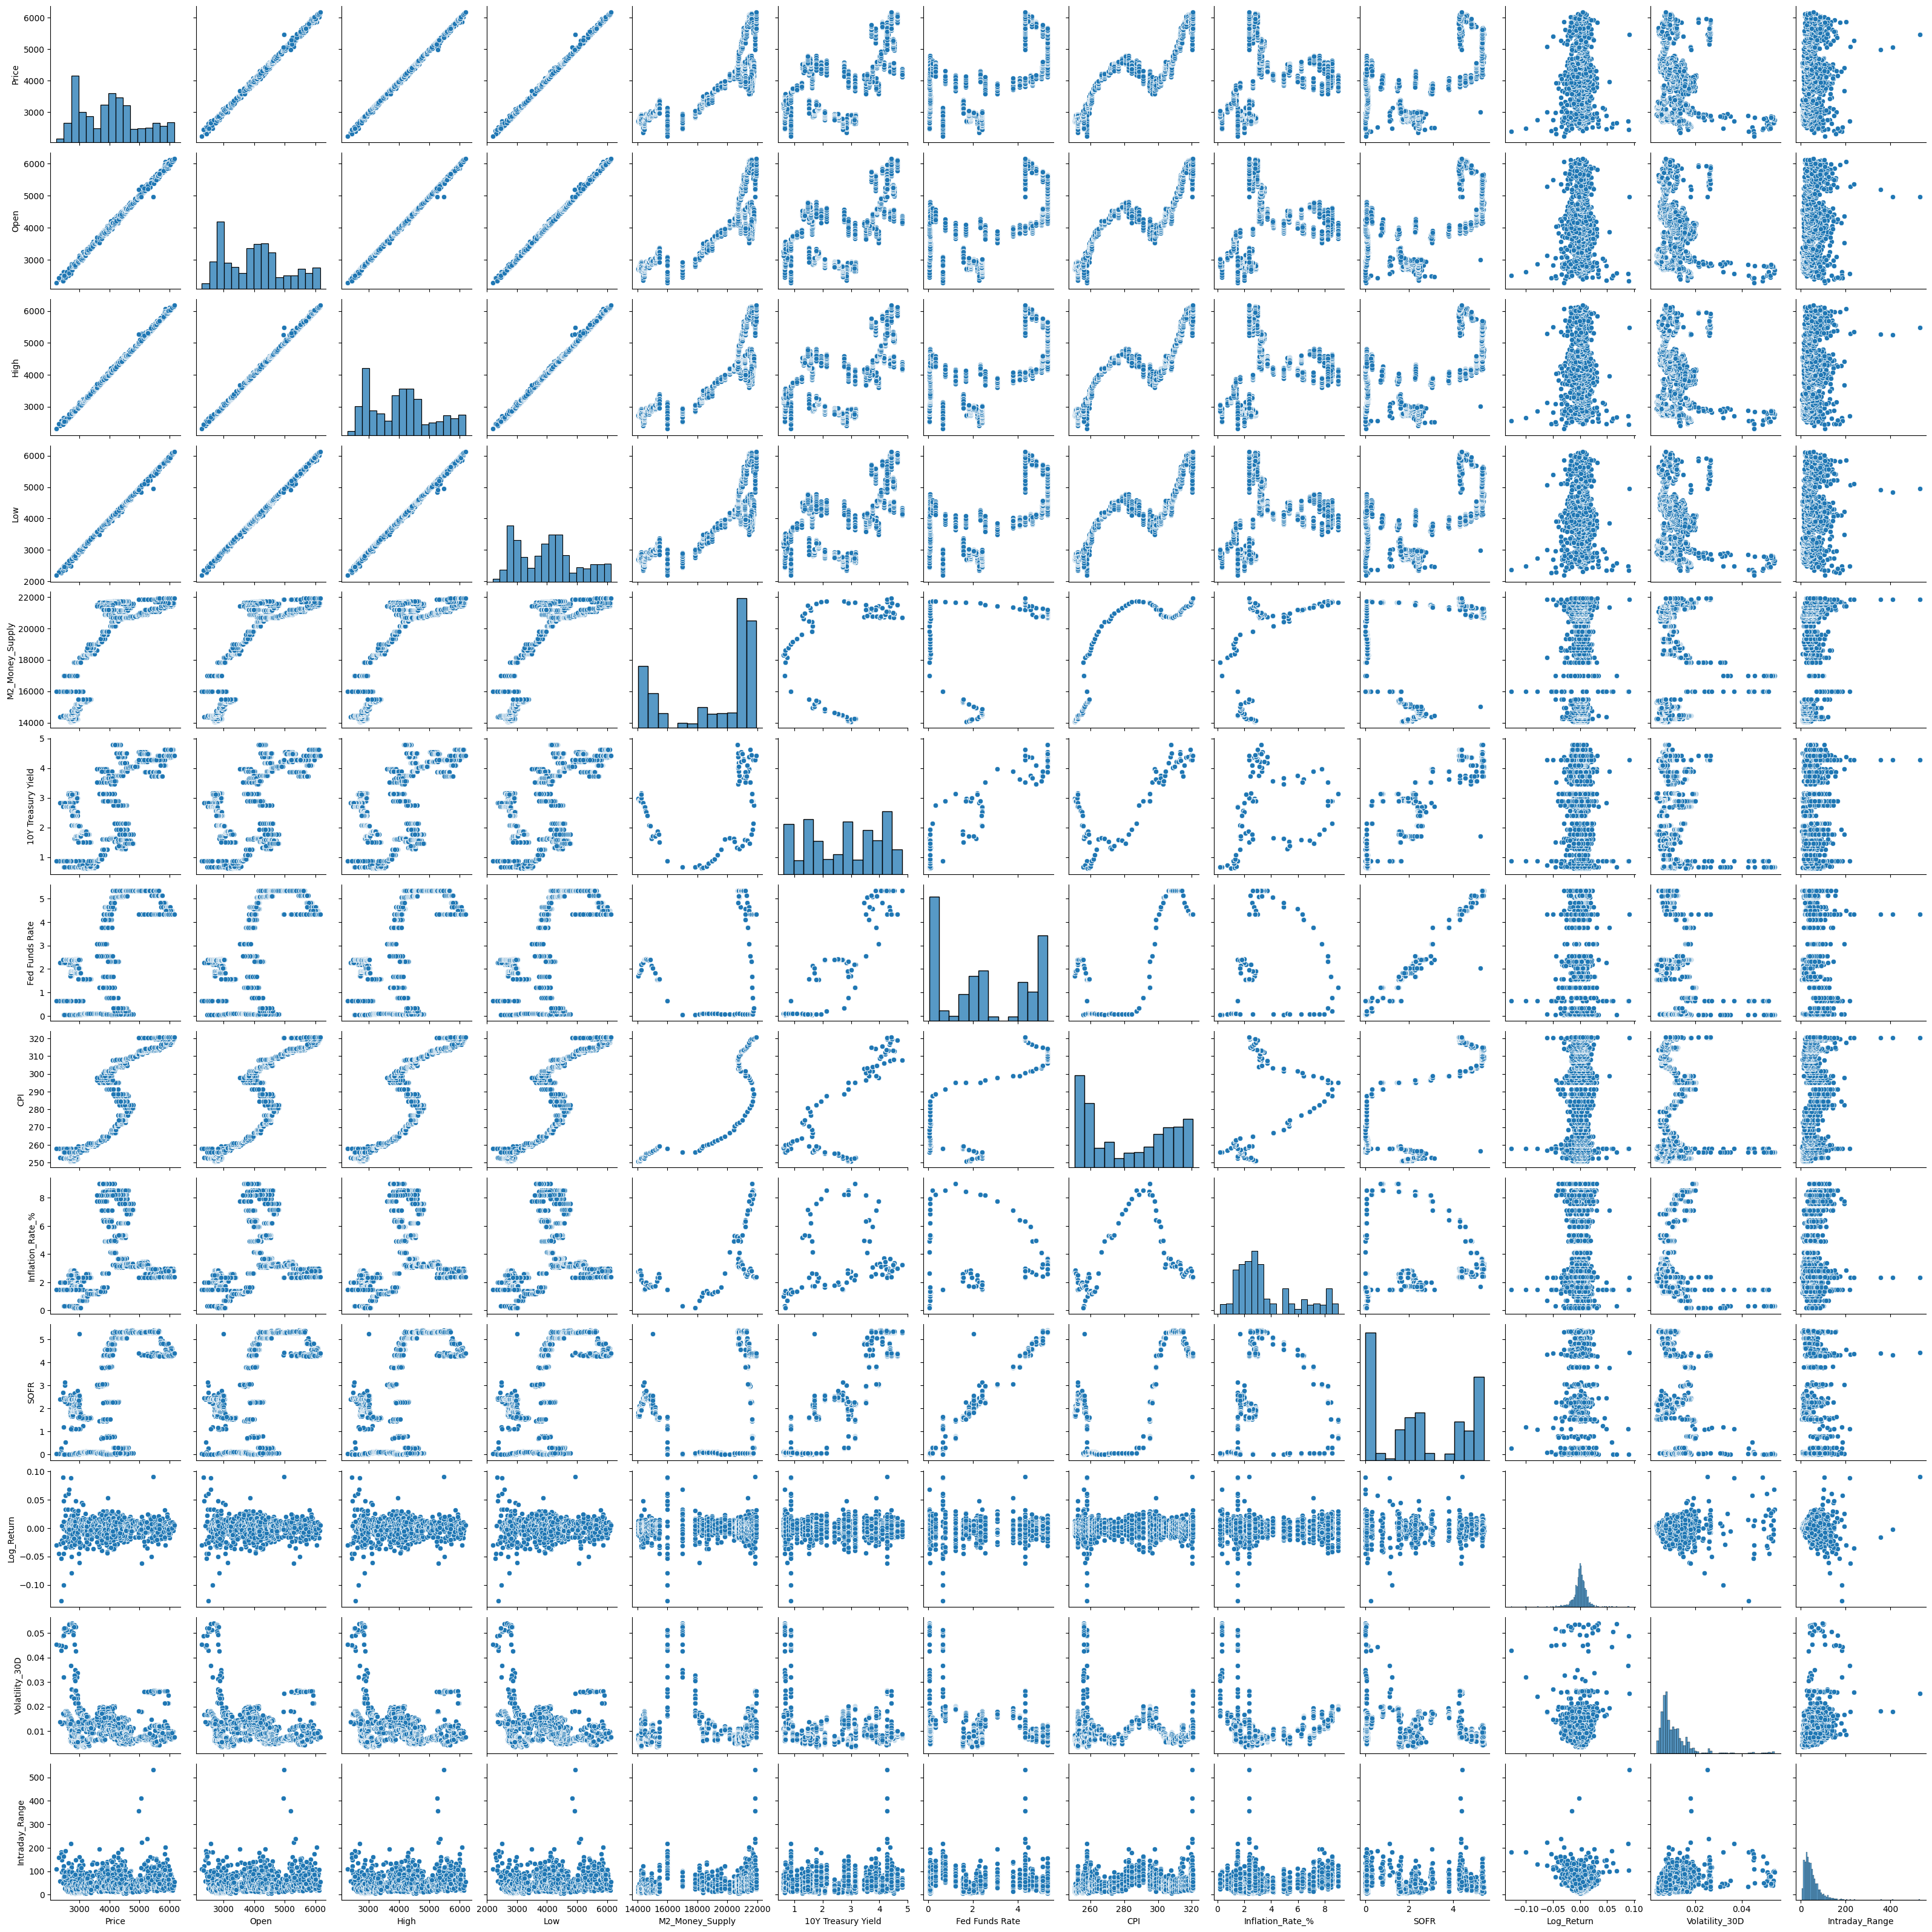

In [76]:
sns.pairplot(merged_df)
plt.show()

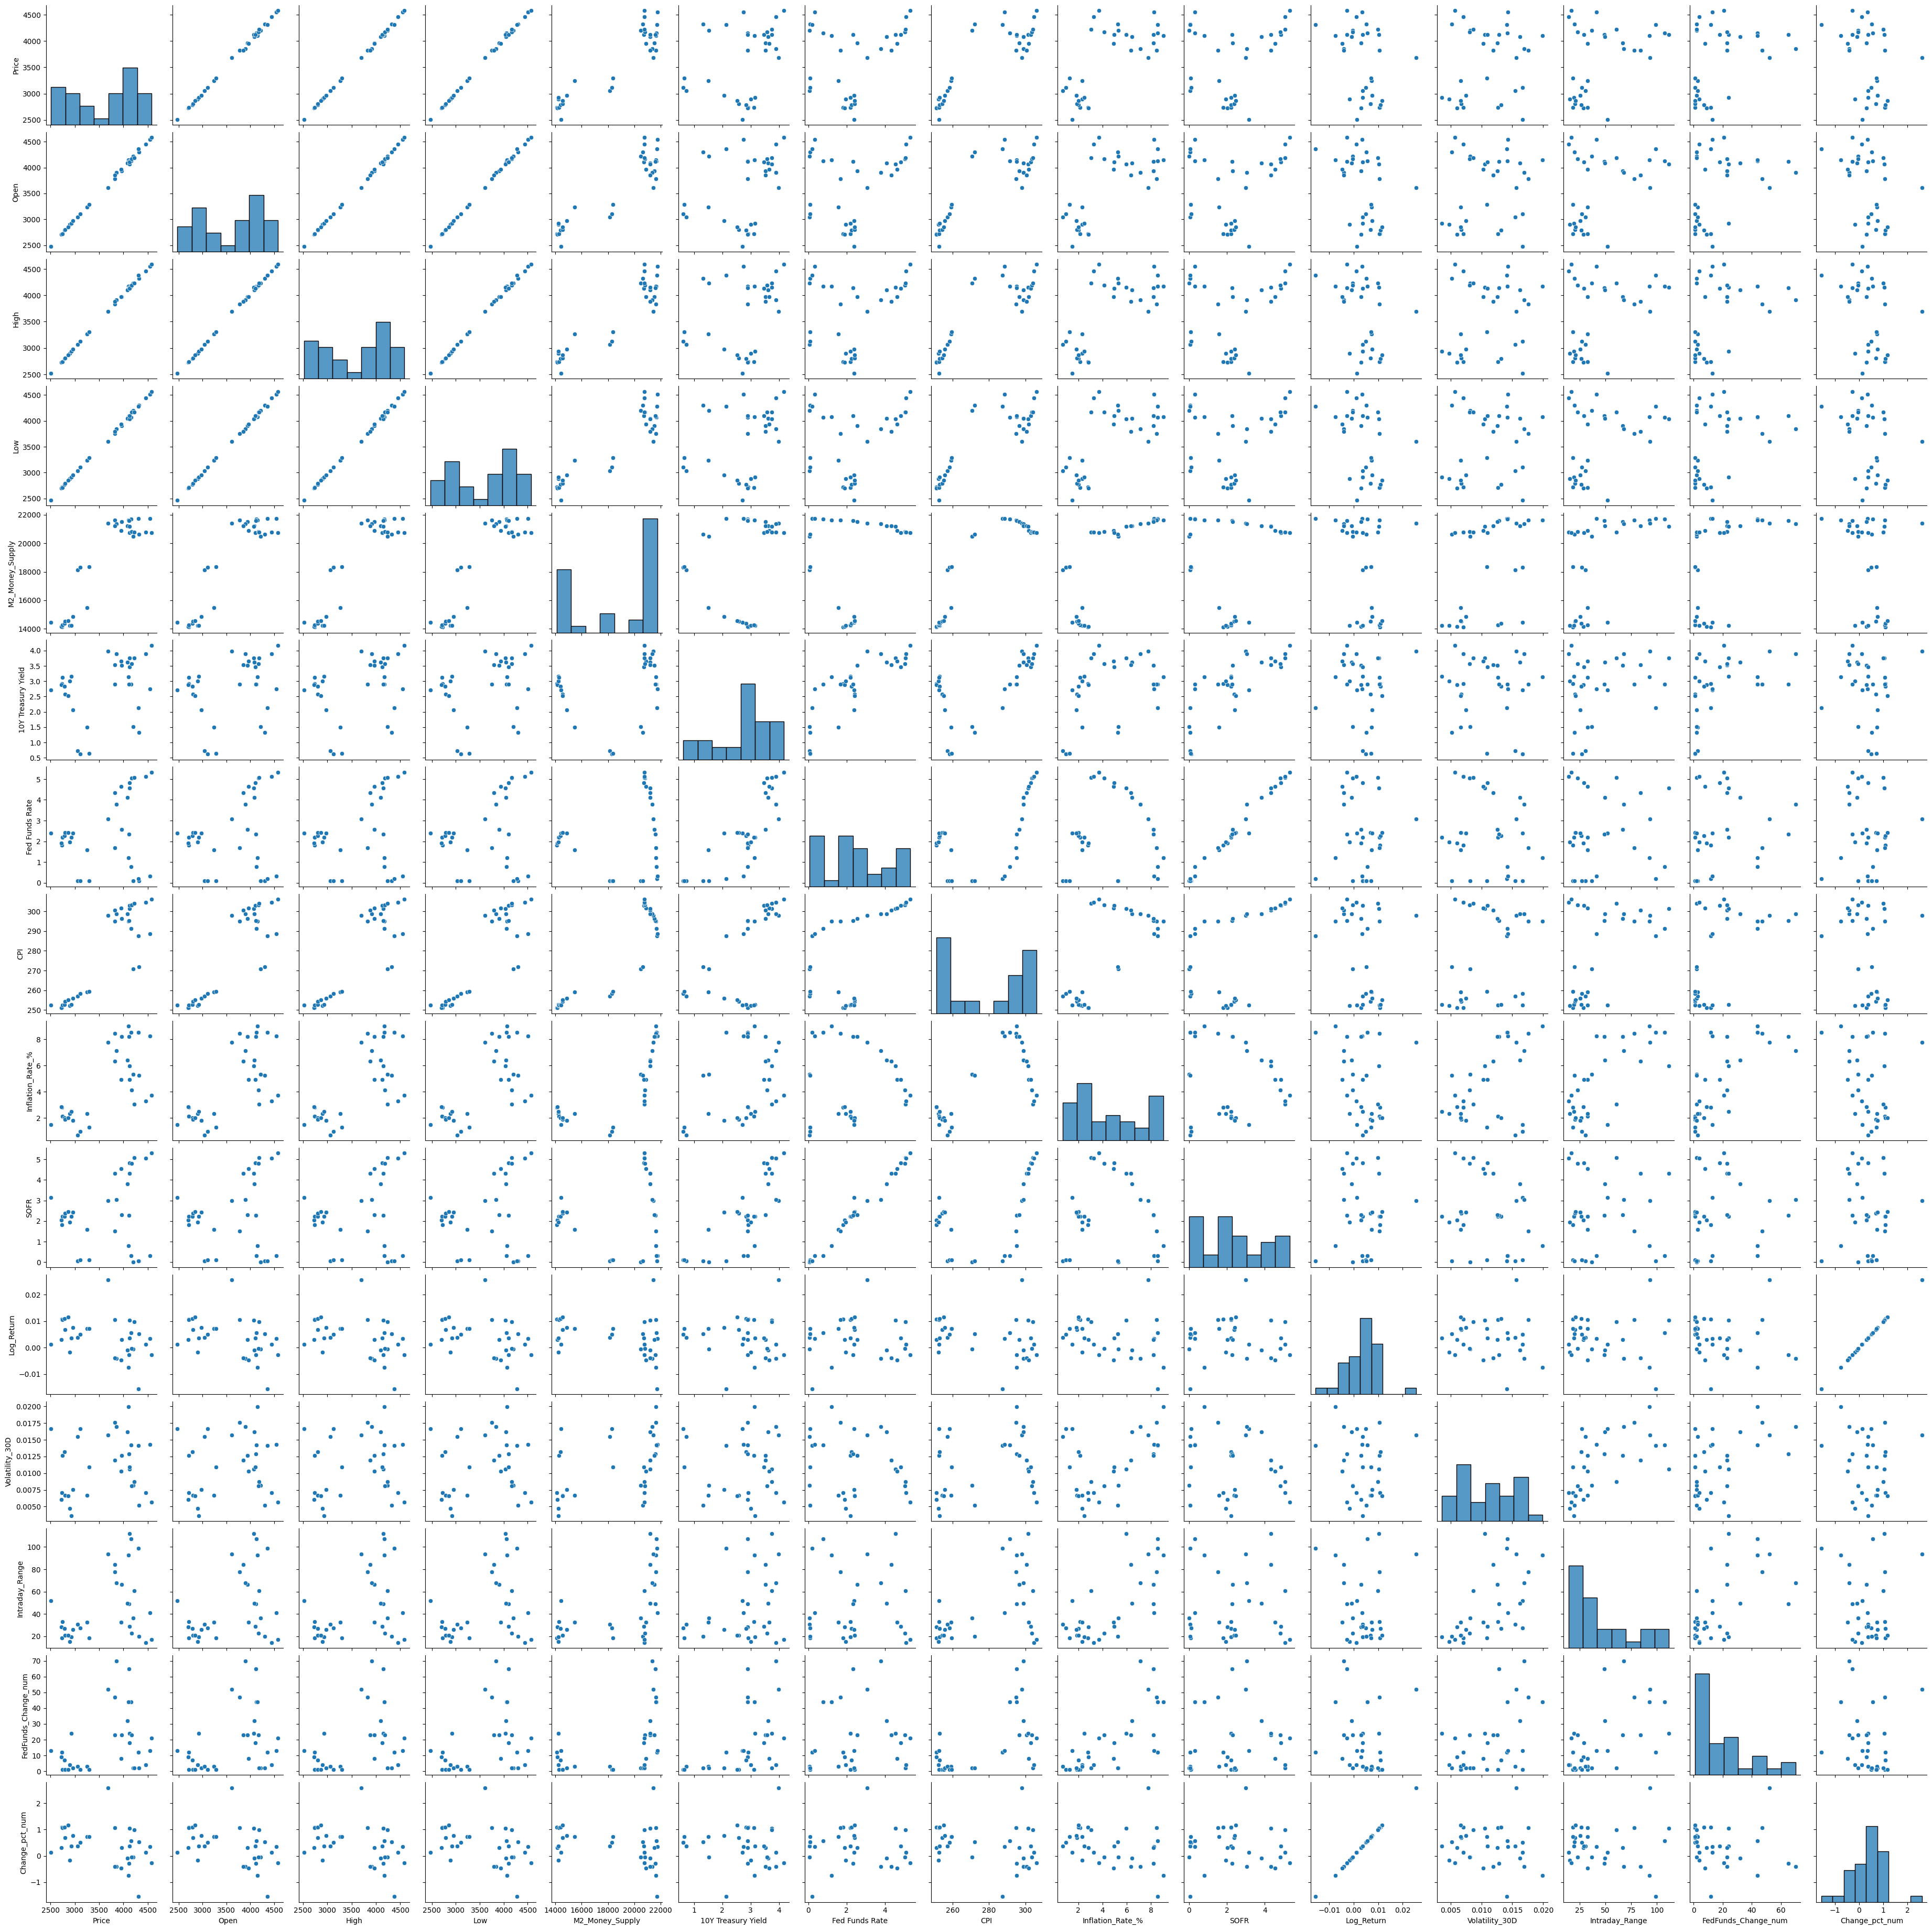

In [77]:
sns.pairplot(hike_days)
plt.show()